In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('tensorflow Version:{}'.format(tf.__version__))

#加载
(train_image,train_lable),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()
#归一化初始数据
train_image = train_image/255
test_image = test_image/255

tensorflow Version:2.0.0-beta0


In [8]:
train_image.shape

(60000, 28, 28)

In [9]:
train_lable.shape

(60000,)

In [10]:
test_image.shape

(10000, 28, 28)

In [11]:
test_label.shape

(10000,)

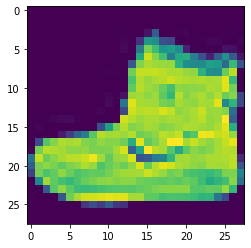

In [13]:
plt.imshow(train_image[0])

In [14]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
np.max(train_image[0])

0

In [17]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
train_image.shape

(60000, 28, 28)

In [55]:
# 建立模型
model = tf.keras.Sequential()

# 添加神经元层
# 第一层
layer1 = tf.keras.layers.Flatten(input_shape=(28,28)) # 把(60000, 28, 28)数据"打平"成28*28的
model.add(layer1)
# 第二层
layer2 = tf.keras.layers.Dense(128,activation='relu') # 
model.add(layer2)
# 第三层
layer3 = tf.keras.layers.Dense(10,activation='softmax') # 有10个类别
model.add(layer3)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
#模型的参数初始化
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) # 'acc'为正确率

In [57]:
# 开始进行模型训练
history = model.fit(train_image,train_lable,epochs=5)#epochs为5是把数据分成5份

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 1.0758 - acc: 0.6658
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6329 - acc: 0.7711
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5576 - acc: 0.8006
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5159 - acc: 0.8181
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4873 - acc: 0.8273


In [58]:
# 用测试数据来进行模型的评价
model.evaluate(test_image,test_label)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.5088 - acc: 0.8176


[0.5088409170150757, 0.8176]

In [ ]:
#学习采用热编码方式对标签进行处理

In [37]:
 # 现在的这些标签是一位表示的，一个数字代表一个种类，单如果要用余弦相似函数来寻找相关性时，这样不行，所以要把他们变成10位向量表示
train_lable[15]

9

In [9]:
# 转换成向量表示的热编码来代替单一的数据标签
train_lable_onehot = tf.keras.utils.to_categorical(train_lable) # 转换成re编码：1维度变10维度

In [39]:
train_lable_onehot[15] # 第九的位置是1，其他都是0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
teset_lable_onehot = tf.keras.utils.to_categorical(test_label) # 把test也转换成热编码

In [59]:
# 建立模型 基于热编码标签的模型
model_one_hot = tf.keras.Sequential()

# 添加神经元层
# 第一层
layer1 = tf.keras.layers.Flatten(input_shape=(28,28)) # 把(60000, 28, 28)数据"打平"成28*28的
model_one_hot.add(layer1)
# 第二层
layer2 = tf.keras.layers.Dense(128,activation='relu') # 
model.add(layer2)
# 第三层
layer3 = tf.keras.layers.Dense(10,activation='softmax') # 有10个类别
model_one_hot.add(layer3)

model_one_hot.summary()

#模型的参数初始化：这里的损失函数要改为“categorical_crossentropy”
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1) # 单独初始化优化器，调整一下learning_rate参数，试一下
model_one_hot.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc']) # 'acc'为正确率

# 开始进行模型训练
history = model_one_hot.fit(train_image,train_lable_onehot,epochs=5)#epochs为5是把数据分成5份

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.6781 - acc: 0.7758
Epoch 2/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4934 - acc: 0.8290
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4595 - acc: 0.84000s - loss: 0.4596 - acc: 0.84
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4432 - acc: 0.8453
Epoch 5/5
60000/60000 [==============================] - 

In [60]:
# 通过测试数据来进行模型的得分评估
model_one_hot.evaluate(test_image,teset_lable_onehot)

10000/10000 [==============================] - 0s 14us/sample - loss: 0.4599 - acc: 0.8350


[0.45994726943969727, 0.835]

In [61]:
# 对test数据级进行预测
predict =  model_one_hot.predict(test_image)
predict.shape

(10000, 10)

In [48]:
np.argmax(predict[0]) # argmax是取最大值所在的索引位置，max（）是用来取最大的元素值

9

In [47]:
test_label[0]

9

In [33]:
# 上面的模型对训练数据的准确率都太底了，属于严重的欠拟合（高偏差）
# 下面通过来调整超参数，来建立新的模型2进行欠拟合问题的解决
# 建立序列模型
model2 = tf.keras.Sequential()

# 通过增加神经元个数和神经网络层数来解决欠拟合问题
layer1 = tf.keras.layers.Flatten(input_shape=(28,28)) # 将数据打平先
model2.add(layer1)

layer2 = tf.keras.layers.Dense(128,activation='relu')
model2.add(layer2)

laryer_dropout1 = tf.keras.layers.Dropout(0.2) # 注意Dropout参数是删除比，用了Dropout
model2.add(laryer_dropout1) # 可见添加Dropout层来解决数据不足时的过拟合问题

layer3 = tf.keras.layers.Dense(128,activation='relu')
model2.add(layer3)

laryer_dropout2 = tf.keras.layers.Dropout(0.2) 
model2.add(laryer_dropout2) # 可见添加Dropout层来解决数据不足时的过拟合问题

layer4 = tf.keras.layers.Dense(128,activation='relu')
model2.add(layer4)

# layer5 = tf.keras.layers.Dense(16,activation='relu')
# model2.add(layer5)

layer6 = tf.keras.layers.Dense(10,activation='softmax')
model2.add(layer6)

model2.summary()

optimizer = tf.optimizers.Adam(0.01)
model2.compile(optimizer,loss='categorical_crossentropy',metrics=['acc'])

#validation_data 相当于在训练每一个epochs时，都与用validation_data的测试数据取验证一下此次训练在test数据集上的表现
history = model2.fit(train_image,train_lable_onehot,epochs=10,validation_data=(test_image,teset_lable_onehot))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

In [29]:
# 我们来看一下在测试集上的表现

model2.evaluate(test_image,teset_lable_onehot)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.6707 - acc: 0.7027


[0.6706536281585693, 0.7027]

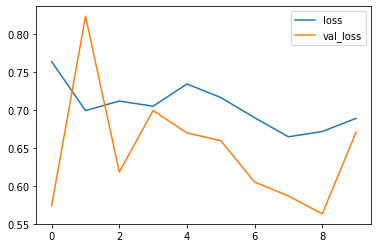

In [30]:
# 把每次训练过程中train数据的损失函数值和测试数据的损失函数值都绘制出来
plt.plot(history.epoch,history.history['loss'],label='loss')
plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
plt.legend()


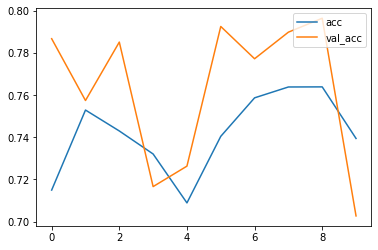

In [31]:
# 把每次训练过程中train数据的正确率函数，与测试数据的真确率函数值都绘制出来
# 把每次训练过程中train数据的损失函数值和测试数据的损失函数值都绘制出来
plt.plot(history.epoch,history.history['acc'],label='acc')
plt.plot(history.epoch,history.history['val_acc'],label='val_acc')
plt.legend()